#Árboles de regresión


In [4]:
#Tratamiento de Datos
import numpy as np
import pandas as pd
#Importamos las libreias para los graficos
import matplotlib.pyplot as plt
#Porcesamiento del modelo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [5]:
#Configuración de warnings
import warnings
warnings.filterwarnings('once')

In [11]:
#Unimos los datos (Predictores y variables  repzuesta en un unico Dtaframe)
boston = load_boston(return_X_y = False)
datos = np.column_stack((boston.data, boston.target))
datos = pd.DataFrame(datos, columns = np.append(boston.feature_names, "MEDV"))
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
#Division de los datos  en train y test
X_train, X_test, y_train,y_tets = train_test_split(
    datos.drop(columns ="MEDV"),
    datos['MEDV'],
    random_state= 123
)
#Creacion del  modelo
modelo = DecisionTreeRegressor(
    max_depth = 3,
    random_state = 123
)
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

Profundidad del árbol : 3
Numero de nodos terminales: 8


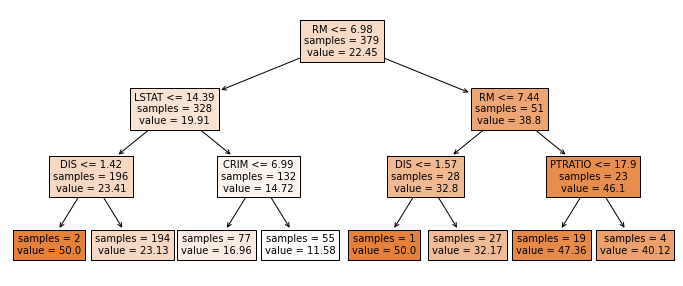

In [25]:
#Estructura del arbol creado
fig,ax = plt.subplots(figsize =(12,5))
print(f"Profundidad del árbol : {modelo.get_depth()}")
print(f"Numero de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = datos.drop(columns = "MEDV").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [29]:
texto_modelo = export_text(
    decision_tree =modelo,
    feature_names = list (datos.drop(columns = "MEDV").columns)
)
print(texto_modelo)

|--- RM <= 6.98
|   |--- LSTAT <= 14.39
|   |   |--- DIS <= 1.42
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.42
|   |   |   |--- value: [23.13]
|   |--- LSTAT >  14.39
|   |   |--- CRIM <= 6.99
|   |   |   |--- value: [16.96]
|   |   |--- CRIM >  6.99
|   |   |   |--- value: [11.58]
|--- RM >  6.98
|   |--- RM <= 7.44
|   |   |--- DIS <= 1.57
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.57
|   |   |   |--- value: [32.17]
|   |--- RM >  7.44
|   |   |--- PTRATIO <= 17.90
|   |   |   |--- value: [47.36]
|   |   |--- PTRATIO >  17.90
|   |   |   |--- value: [40.12]



In [30]:
#Importancia de predictores
importancia_predictores = pd.DataFrame(
    {'predictor':datos.drop(columns ="MEDV").columns,
     'importancia':modelo.feature_importances_}
)
print("Importancia de los predictores en el modelo")
importancia_predictores.sort_values('importancia',ascending =False)

Importancia de los predictores en el modelo


,predictor,importancia
5,RM,0.671680
12,LSTAT,0.222326
7,DIS,0.064816
0,CRIM,0.034714
10,PTRATIO,0.006465
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.000000
6,AGE,0.000000
